In [72]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression



warnings.filterwarnings('ignore')


# 1.1- Select Data

In [73]:
wine = load_wine()
X,y = wine.data, wine.target
print(X.shape)  
print(y.shape)


(178, 13)
(178,)


# 1.2- Treino  e teste

In [74]:
def Dec_tree(X,y,tr='n'):
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    predict_train = dtc.predict(X_train)
    predict_test = dtc.predict(X_test)
    if tr=='y':
        print('Train Set Decision Tree:\n',classification_report(y_train, predict_train))
        print('Train Confusion Matrix Decision Tree:\n',confusion_matrix(y_train,predict_train))
    print('Test SetDecision Tree:\n',classification_report(y_test, predict_test))
    print('Test Confusion Matrix Decision Tree:\n',confusion_matrix(y_test,predict_test))

In [75]:
def Log_Reg(X,y,tr='n'):
    LRc = LogisticRegression()
    LRc.fit(X_train, y_train)
    predict_train = LRc.predict(X_train)
    predict_test = LRc.predict(X_test)
    print('Test Set Logistic Regression:\n',classification_report(y_test, predict_test))
    print('Test Confusion Matrix Logistic Regression:\n',confusion_matrix(y_test,predict_test))
    if tr=='y':
        print('Train Set Logistic Regression:\n',classification_report(y_train, predict_train))
        print('Train Confusion Matrix Logistic Regression:\n',confusion_matrix(y_train,predict_train))


In [76]:
def plot_result(y1,y2,SupTitle,y1_label,y2_label):
    if y1.shape[0]!= y2.shape[0]:
        print ("not equal shape")
        return
    x_axis=np.linspace(1,y1.shape[0],y1.shape[0])
    font_title = {'family': 'serif','color':  'green','weight': 'normal','size': 16}
    plt.figure(figsize=(15,5))
    plt.suptitle(SupTitle,fontdict=font_title, va='top')
    plt.subplot(1,2,1)
    plt.xlabel("Round")
    plt.ylabel(y1_label)
    plt.plot(x_axis,y1, label=y1_label,alpha=1,color='g', ls='--', lw='2')
    plt.subplot(1,2,2)
    plt.xlabel("Round")
    plt.ylabel(y2_label)
    plt.plot(x_axis,y2, label=y2_label,alpha=1,color='b', ls='--', lw='2')
    plt.show()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 42 )


## 1.2.1- Decision Tree

In [78]:
Dec_tree(X,y)

Test SetDecision Tree:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93        44
           1       0.81      0.86      0.83        50
           2       0.92      0.71      0.80        31

    accuracy                           0.86       125
   macro avg       0.87      0.85      0.86       125
weighted avg       0.87      0.86      0.86       125

Test Confusion Matrix Decision Tree:
 [[43  1  0]
 [ 5 43  2]
 [ 0  9 22]]


## 1.2.2- Logistic Regression

In [79]:
Log_Reg(X,y)

Test Set Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.90      0.94      0.92        50
           2       0.97      0.94      0.95        31

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125

Test Confusion Matrix Logistic Regression:
 [[41  3  0]
 [ 2 47  1]
 [ 0  2 29]]


## 1.3- Cross Validate

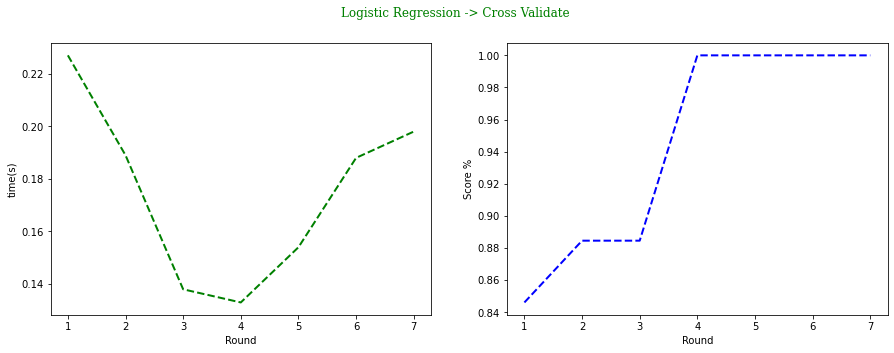

In [80]:
LR_model= LogisticRegression()
scores_LR = cross_validate(LR_model,X,y,cv=7)
mean_scores_LR_CV=np.mean(scores_LR['test_score'])
mean_fit_time_LR_CV=np.mean(scores_LR['fit_time'])
plot_result(scores_LR['fit_time'],scores_LR['test_score'],SupTitle="Logistic Regression -> Cross Validate",y1_label='time(s)',y2_label='Score %')



## 1.4-Pipelines

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

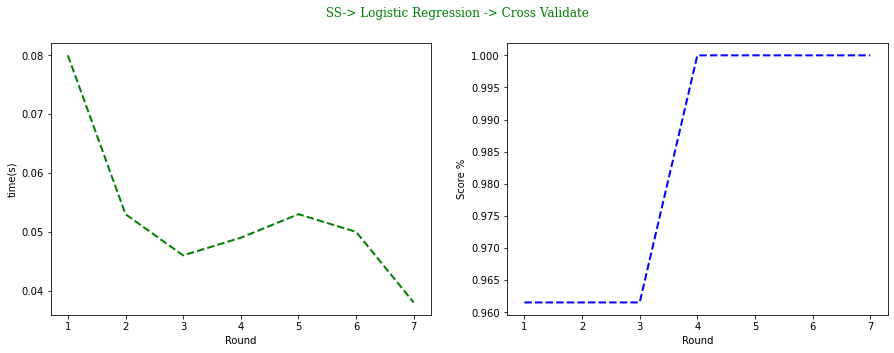

In [82]:
SS = StandardScaler()
X_new = SS.fit_transform(X)
scores_SS_LR = cross_validate(LR_model,X_new,y,cv=7)
SS_LR = np.mean(scores_SS_LR['test_score'])
mean_scores_SS_LR=np.mean(scores_SS_LR['test_score'])
mean_fit_time_SS_LR=np.mean(scores_SS_LR['fit_time'])
plot_result(scores_SS_LR['fit_time'],scores_SS_LR['test_score'],SupTitle=" SS-> Logistic Regression -> Cross Validate",y1_label='time(s)',y2_label='Score %')



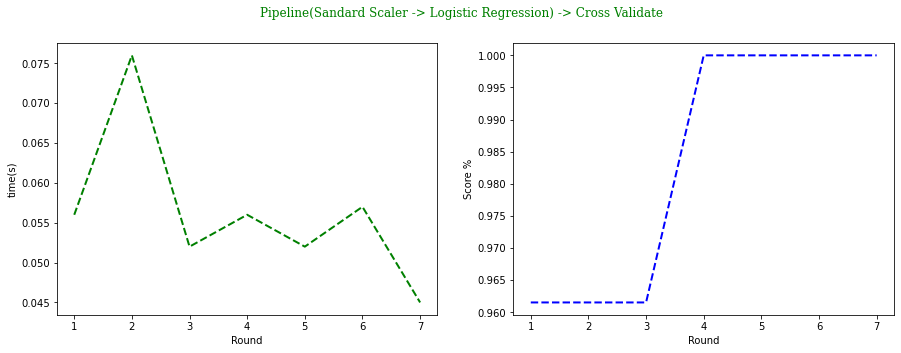

In [83]:
SS_LR_pipe= Pipeline([
                ('Uniform_data', StandardScaler()),
                ('Model_LR', LogisticRegression())])
scores_CV_SS_LR_pipe = cross_validate(SS_LR_pipe,X,y,cv=7)
mean_scores_CV_SS_LR_pipe=np.mean(scores_CV_SS_LR_pipe['test_score'])
mean_fit_time_CV_SS_LR_pipe=np.mean(scores_CV_SS_LR_pipe['fit_time'])
plot_result(scores_CV_SS_LR_pipe['fit_time'],scores_CV_SS_LR_pipe['test_score'],SupTitle="Pipeline(Sandard Scaler -> Logistic Regression) -> Cross Validate",y1_label='time(s)',y2_label='Score %')


<Figure size 1080x360 with 0 Axes>

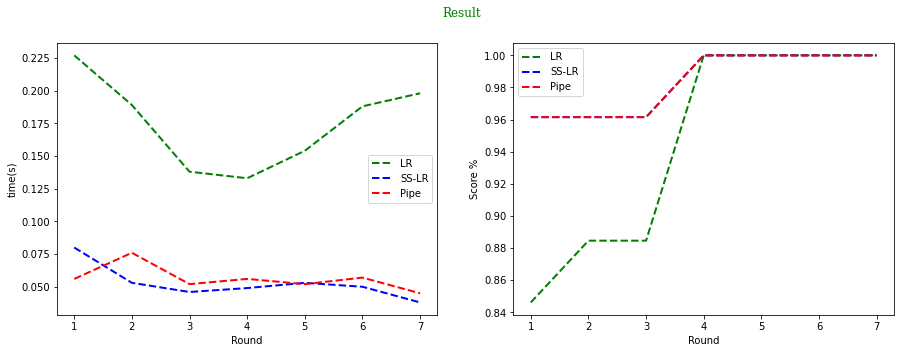

In [88]:
plt.figure(figsize=(15,5))
x_axis=np.linspace(1,scores_CV_SS_LR_pipe['fit_time'].shape[0],scores_CV_SS_LR_pipe['fit_time'].shape[0])
font_title = {'family': 'serif','color':  'green','weight': 'normal','size': 16}
plt.figure(figsize=(15,5))
plt.suptitle("Result",fontdict=font_title, va='top')
plt.subplot(1,2,1)
plt.xlabel("Round")
plt.ylabel('time(s)')
plt.plot(x_axis,scores_LR['fit_time'], label="LR",alpha=1,color='g', ls='--', lw='2')
plt.plot(x_axis,scores_SS_LR['fit_time'], label="SS-LR",alpha=1,color='b', ls='--', lw='2')
plt.plot(x_axis,scores_CV_SS_LR_pipe['fit_time'], label="Pipe",alpha=1,color='r', ls='--', lw='2')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Round")
plt.ylabel('Score %')
plt.plot(x_axis,scores_LR['test_score'], label="LR",alpha=1,color='g', ls='--', lw='2')
plt.plot(x_axis,scores_SS_LR['test_score'], label="SS-LR",alpha=1,color='b', ls='--', lw='2')
plt.plot(x_axis,scores_CV_SS_LR_pipe['test_score'], label="Pipe",alpha=1,color='r', ls='--', lw='2')
plt.legend()
plt.show()


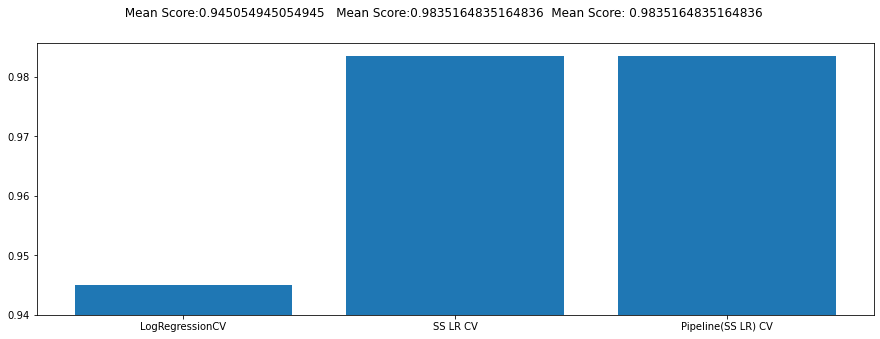

In [89]:
plt.figure(figsize=(15,5))
plt.suptitle(f' Mean Score:{mean_scores_LR_CV}   Mean Score:{mean_scores_SS_LR}  Mean Score: {mean_scores_CV_SS_LR_pipe}')
x_Bar =['LogRegressionCV','SS LR CV','Pipeline(SS LR) CV']
plt.bar(x_Bar,np.array([mean_scores_LR_CV, mean_scores_SS_LR, mean_scores_CV_SS_LR_pipe])-0.94, bottom=0.94)
plt.show()


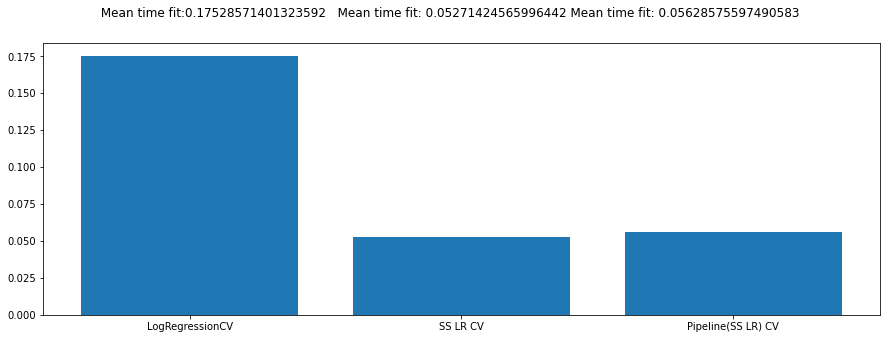

In [91]:
plt.figure(figsize=(15,5))
plt.suptitle(f' Mean time fit:{mean_fit_time_LR_CV}   Mean time fit: {mean_fit_time_SS_LR} Mean time fit: {mean_fit_time_CV_SS_LR_pipe}')
x_Bar =['LogRegressionCV','SS LR CV','Pipeline(SS LR) CV']
plt.bar(x_Bar,np.array([mean_fit_time_LR_CV, mean_fit_time_SS_LR, mean_fit_time_CV_SS_LR_pipe]))
plt.show()
